In [134]:
# %load_ext autoreload
# %autoreload 2


In [135]:
1

1

In [136]:
import pandas as pd

In [137]:
# import h5py
# 
# # File path
# file_path = r"E:\New folder\23712957\pose_estimation\train\cam0_DR3_2020_10_27_1\CollectedData_All.h5"
# 
# # Open the HDF5 file
# with h5py.File(file_path, 'r') as h5_file:
#     # List all groups and datasets in the file
#     def list_h5_structure(name, obj):
#         if isinstance(obj, h5py.Dataset):
#             print(f"Dataset: {name} | Shape: {obj.shape} | Dtype: {obj.dtype}")
#         elif isinstance(obj, h5py.Group):
#             print(f"Group: {name}")
# 
#     print("File structure:")
#     h5_file.visititems(list_h5_structure)
# 
#     # Access specific data (replace 'dataset_name' with actual names found above)
#     # Example:
#     # dataset = h5_file['dataset_name'][:]
#     # print(dataset)


In [138]:
# import h5py
# 
# # File path
# file_path = r"E:\New folder\23712957\pose_estimation\train\cam0_DR3_2020_10_27_1\CollectedData_All.h5"
# 
# # Load the dataset
# with h5py.File(file_path, 'r') as h5_file:
#     keypoint_data = h5_file['df/block0_values'][:]
#     bodyparts = h5_file['df/axis0_level1'][:]
#     # print("Shape of the keypoint dataset:", keypoint_data.shape)
#     # print("Sample data:\n", keypoint_data[:5])  # Print the first 5 rows
#     for key in h5_file['df'].keys():
#         print(h5_file['df'][key])
#     print(h5_file['df'].keys())
#     print(h5_file['df/axis0_level2'][:])

In [139]:
# bodyparts

In [140]:
# facemap_dataset = FacemapDataset(datadir=r"E:\New folder\23712957\pose_estimation\train\cam0_DR3_2020_10_27_1", keypoints_data=keypoint_data)


In [6]:
import os 
from datasets import FacemapDataset
from glob import glob
import h5py
import numpy as np
import torch

class KeypointsLoader:
    def __init__(self, datadir, scorer="All", bodyparts=None):
        self.datadir = datadir
        self.scorer = scorer
        self.bodyparts = bodyparts or ["eye(back)", "eye(bottom)", "nose(tip)", "whisker(I)", "mouth", "paw"]  # Example bodyparts

    def load_keypoints_h5(self):
        """
        Load landmarks/keypoints from the directory provided containing .h5 files using h5py.
        Returns
        -------
        landmarks : torch.Tensor
            Tensor containing keypoints for all frames, of shape (num_frames, 15, 2).
        """
        # Landmarks/key points info
        annotation_files = sorted(
            glob(os.path.join(self.datadir, f"CollectedData_{self.scorer}.h5"))
        )
        if len(annotation_files) == 0:
            annotation_files = sorted(
                glob(
                    os.path.join(
                        self.datadir, f"*/CollectedData_{self.scorer}.h5"
                    )
                )
            )
        if len(annotation_files) == 0:
            raise ValueError("No .h5 files found in the directory")

        # Landmarks array initialization
        all_landmarks = []

        for f in annotation_files:
            with h5py.File(f, 'r') as h5_file:
                # Explore the structure of the file
                print(f"Keys in {f}: {list(h5_file['df'].keys())}")
                
                # Load keypoints data
                keypoints_data = h5_file['df/block0_values'][:]
                print("Shape of keypoint data:", keypoints_data.shape)
                
                # Assuming the shape is (num_frames, num_keypoints * 2) where 15 body parts and 2 coordinates (x, y)
                num_frames, num_coords = keypoints_data.shape
                num_bodyparts = 15  # As per your comment in the original code
                if num_coords != num_bodyparts * 2:
                    raise ValueError(f"Unexpected number of coordinates: {num_coords}. Expected {num_bodyparts * 2}.")
                
                # Reshape the data to (num_frames, 15, 2)
                reshaped_data = keypoints_data.reshape(num_frames, num_bodyparts, 2)

                # Optionally apply any label fixing here (you can modify the labels similarly as in fix_labels)
                reshaped_data = self.fix_labels(reshaped_data)

                # Append data to the list
                all_landmarks.append(reshaped_data)

        # Concatenate all the frames from all files
        all_landmarks = np.concatenate(all_landmarks, axis=0)

        # Convert to tensor
        # all_landmarks = torch.tensor(all_landmarks, dtype=torch.float32)
        return all_landmarks

    def fix_labels(self, landmarks_data):
        """
        Placeholder function for renaming bodyparts.
        Here, you can apply similar logic as in `fix_labels` function.
        """
        # Example of applying label fixes based on bodyparts
        for i, landmark_set in enumerate(landmarks_data):
            for j, bodypart in enumerate(self.bodyparts):
                # Here, you can match the bodypart and apply renaming logic if necessary
                # This is where you would replace your previous 'fix_labels' logic
                pass
        return landmarks_data

# Example Usage
datadir = r"E:\New folder\23712957\pose_estimation\train\TX69_2021_07_15_3_cam1"
scorer = "All"
loader = KeypointsLoader(datadir, scorer)
landmarks = loader.load_keypoints_h5()
print("Landmarks shape:", landmarks.shape)


Keys in E:\New folder\23712957\pose_estimation\train\TX69_2021_07_15_3_cam1\CollectedData_All.h5: ['axis0_label0', 'axis0_label1', 'axis0_label2', 'axis0_level0', 'axis0_level1', 'axis0_level2', 'axis1', 'block0_items_label0', 'block0_items_label1', 'block0_items_label2', 'block0_items_level0', 'block0_items_level1', 'block0_items_level2', 'block0_values']
Shape of keypoint data: (25, 30)
Landmarks shape: (25, 15, 2)


In [30]:

landmarks.shape

(25, 15, 2)

In [8]:
facemap_dataset = FacemapDataset(datadir=r"E:\New folder\23712957\pose_estimation\train\TX69_2021_07_15_3_cam1", keypoints_data=landmarks)

In [29]:
for item in facemap_dataset:
    print(item.keys())
    

dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])
dict_keys(['image', 'keypoints', 'bbox', 'item'])


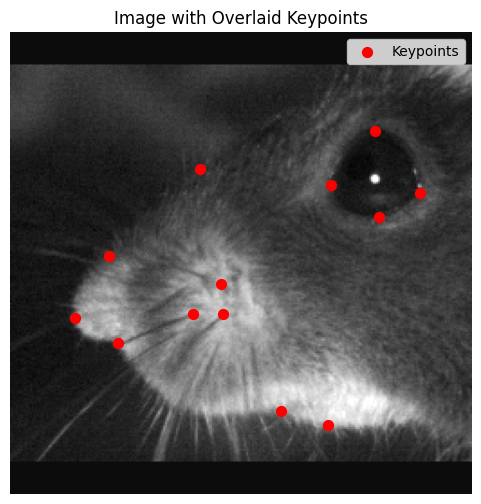

In [12]:
import matplotlib.pyplot as plt
image = item['image'].squeeze()
keypoints = item['keypoints']

 # Plot the image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')  # Display grayscale image
plt.scatter(keypoints[:, 0], keypoints[:, 1], c='red', s=50, label='Keypoints')  # Overlay keypoints

# Add labels and legend
plt.title("Image with Overlaid Keypoints")
plt.axis('off')  # Remove axes for better visualization
plt.legend()

# Show plot
plt.show()

In [76]:
from model_training import train
from facemap_network import FMnet

img_ch=1
output_ch = 15

channels = [32, 64, 128, 128, 200]

net = FMnet(       
        img_ch,
        output_ch,
        None,
        channels,
        device='cuda',
        kernel=3,
        shape=(256, 256),
        n_upsample=2,
    )
    
n_epochs = 50
learning_rate = 1e-3
weight_decay = 1e-6
batch_size = 4

train_dataloader = torch.utils.data.DataLoader(
            facemap_dataset, batch_size=batch_size, shuffle=True
        )

net = train(train_dataloader,
      net,
      n_epochs,
      learning_rate,
      weight_decay,
      ggmax=50,
      test_dataloader=None,
      save_checkpoint=False,
      checkpoint_path=None,
      checkpoint_filename=None,
      gui=None,
      gui_obj=None,
      )


Epoch 0: train loss 23.138104, train mean 15.833266, gnorm_max 107.156082 avg. test rmse inf
Epoch 5: train loss 10.662800, train mean 2.052567, gnorm_max 71.670906 avg. test rmse inf
Epoch 10: train loss 7.419750, train mean 0.832071, gnorm_max 35.081078 avg. test rmse inf
Epoch 15: train loss 5.950055, train mean 0.651331, gnorm_max 32.815937 avg. test rmse inf
Epoch 20: train loss 5.586809, train mean 0.651838, gnorm_max 34.783245 avg. test rmse inf
Epoch 25: train loss 4.755199, train mean 0.544358, gnorm_max 31.726498 avg. test rmse inf
Epoch 30: train loss 4.451873, train mean 0.525666, gnorm_max 34.233440 avg. test rmse inf
Epoch 35: train loss 4.208752, train mean 0.494240, gnorm_max 28.118151 avg. test rmse inf
Epoch 40: train loss 4.335114, train mean 0.518044, gnorm_max 26.483126 avg. test rmse inf
Epoch 45: train loss 3.310071, train mean 0.357882, gnorm_max 22.681612 avg. test rmse inf


In [130]:
net.device = 'cpu'

In [116]:

test_dataloader = torch.utils.data.DataLoader(
            facemap_dataset, batch_size=30, shuffle=False
        )

In [128]:
from model_training import get_test_predictions
pred_keypoints, keypoints = get_test_predictions(net, test_dataloader)

In [131]:
pred_keypoints.shape, keypoints.shape

(torch.Size([25, 15, 2]), torch.Size([25, 15, 2]))

In [132]:
keypoints.shape

torch.Size([25, 15, 2])

dict_keys(['image', 'keypoints', 'bbox', 'item'])
tensor(0.2646)
dict_keys(['image', 'keypoints', 'bbox', 'item'])
tensor(0.2306)
dict_keys(['image', 'keypoints', 'bbox', 'item'])
tensor(0.1174)
dict_keys(['image', 'keypoints', 'bbox', 'item'])
tensor(0.2839)
dict_keys(['image', 'keypoints', 'bbox', 'item'])
tensor(0.2741)
dict_keys(['image', 'keypoints', 'bbox', 'item'])
tensor(0.1204)
dict_keys(['image', 'keypoints', 'bbox', 'item'])
tensor(0.2481)
dict_keys(['image', 'keypoints', 'bbox', 'item'])
tensor(0.2545)
dict_keys(['image', 'keypoints', 'bbox', 'item'])
tensor(0.1627)
dict_keys(['image', 'keypoints', 'bbox', 'item'])
tensor(0.3824)
dict_keys(['image', 'keypoints', 'bbox', 'item'])
tensor(0.2543)
dict_keys(['image', 'keypoints', 'bbox', 'item'])
tensor(0.5481)
dict_keys(['image', 'keypoints', 'bbox', 'item'])
tensor(0.4999)
dict_keys(['image', 'keypoints', 'bbox', 'item'])
tensor(0.2474)
dict_keys(['image', 'keypoints', 'bbox', 'item'])
tensor(0.1695)
dict_keys(['image', 'keyp

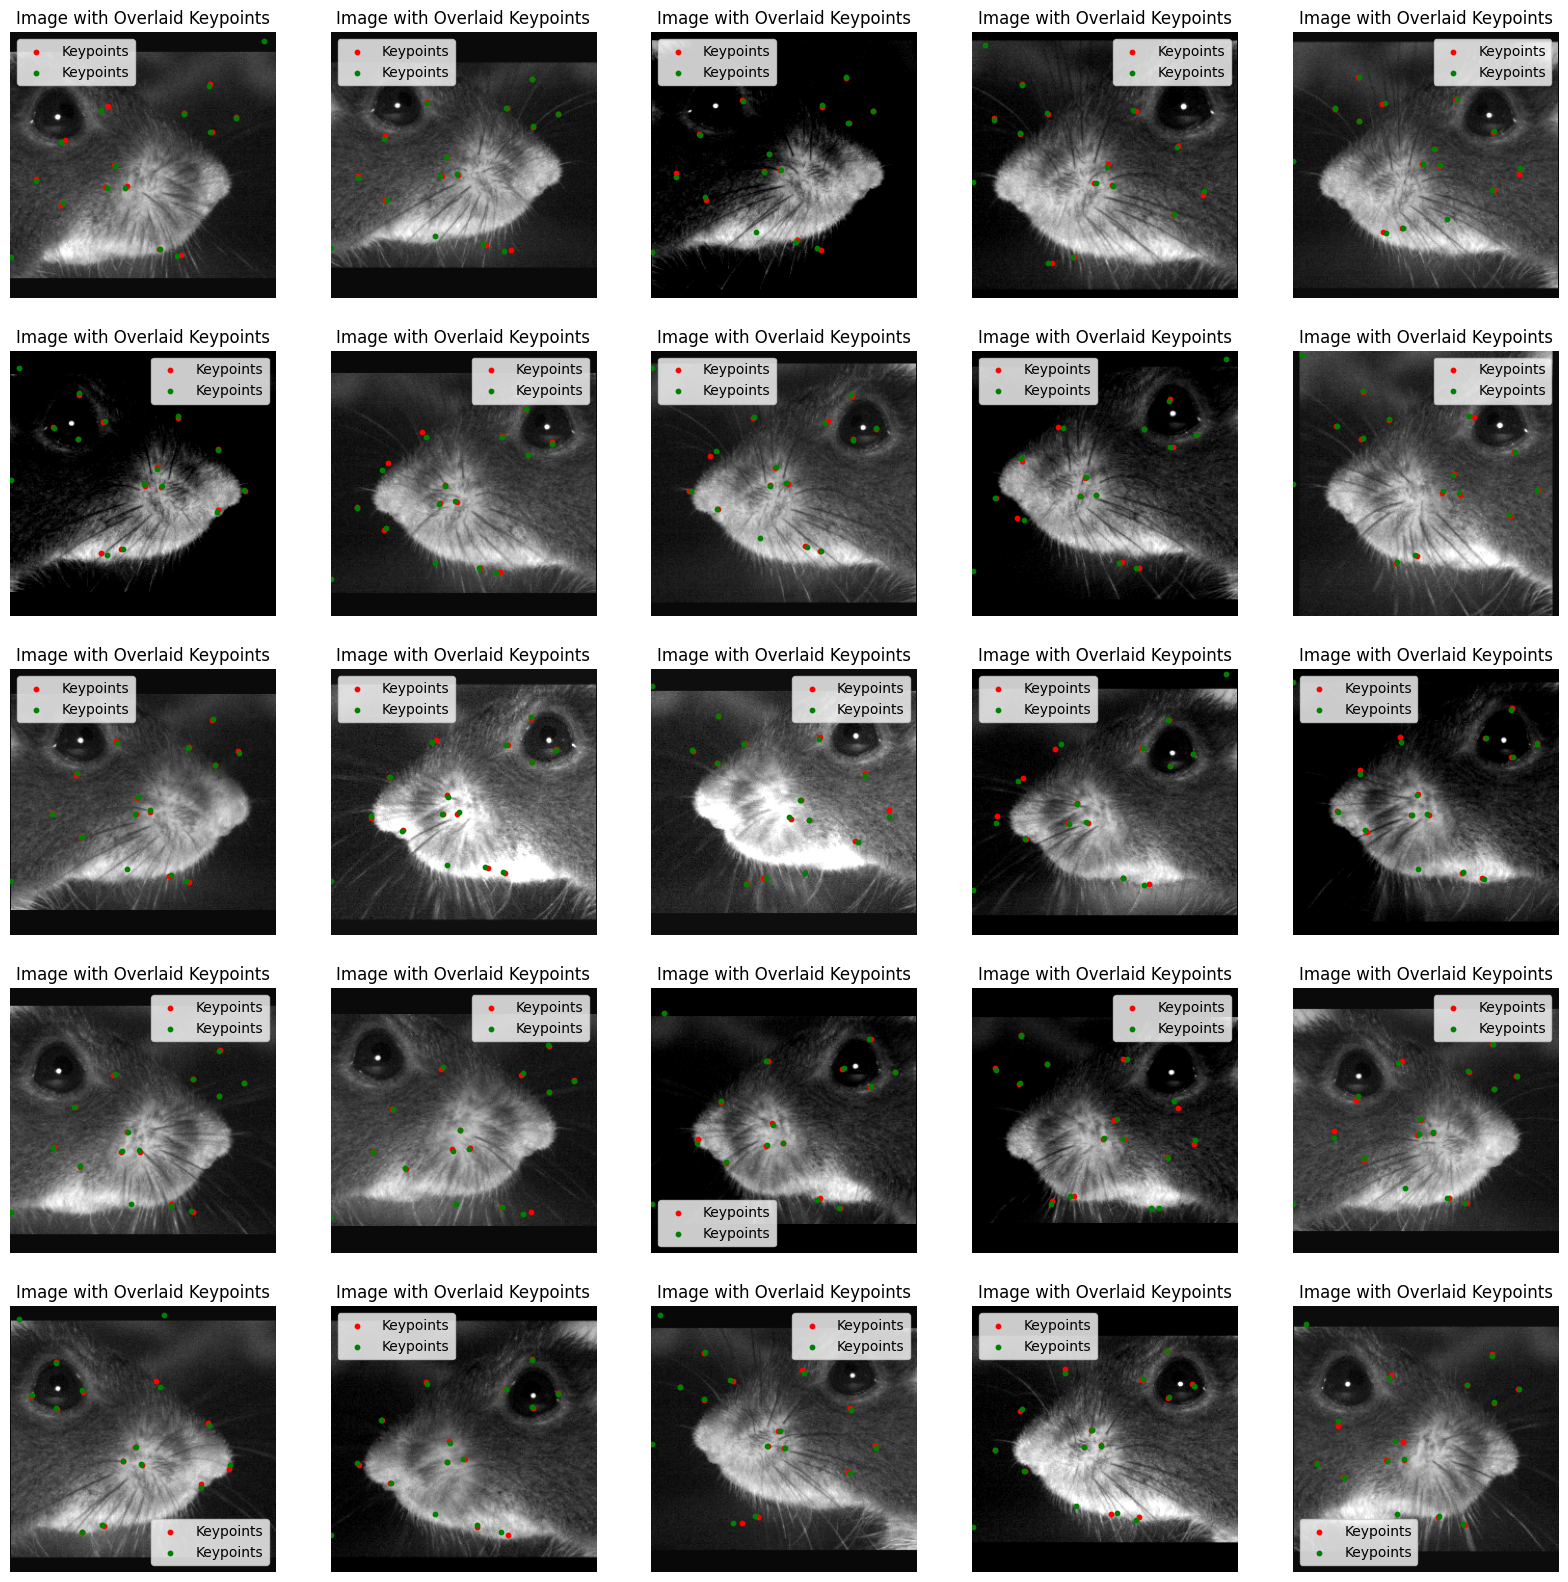

In [129]:


import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
        
for ind in range(keypoints.shape[0]):
    for item in test_dataloader:
        print(item.keys())
        image = item['image'][ind].squeeze()
        print(image.mean())
        # break
    
        # image = item['image'].squeeze()
        plt.subplot(5,5, ind+1)
         # Plot the image
        plt.imshow(image, cmap='gray')  # Display grayscale image
        plt.scatter(keypoints[ind, :, 0], keypoints[ind, :, 1], c='red', s=10, label='Keypoints')  # Overlay keypoints
        plt.scatter(pred_keypoints[ind, :, 0], pred_keypoints[ind, :, 1], c='green', s=10, label='Keypoints')  # Overlay keypoints
        
    # Add labels and legend
    plt.title("Image with Overlaid Keypoints")
    plt.axis('off')  # Remove axes for better visualization
    plt.legend()
    
# Show plot
plt.show()

In [133]:
import torch
torch.cuda.is_available()

False